# GSEM 

gene_name,zscore,tissue
<chr>,<dbl>,<chr>
OPRM1,5.4129088,Cerebellum
FURIN,0.4180391,Cerebellum
PPP6C,-4.8904920,Frontal Cortex (BA9)
FURIN,2.5801711,Frontal Cortex (BA9)
PPP6C,-4.8904920,Cortex
FURIN,2.7429495,Cortex
PPP6C,-5.0002112,Anterior cingulate cortex (BA24)
FURIN,2.7429495,Anterior cingulate cortex (BA24)


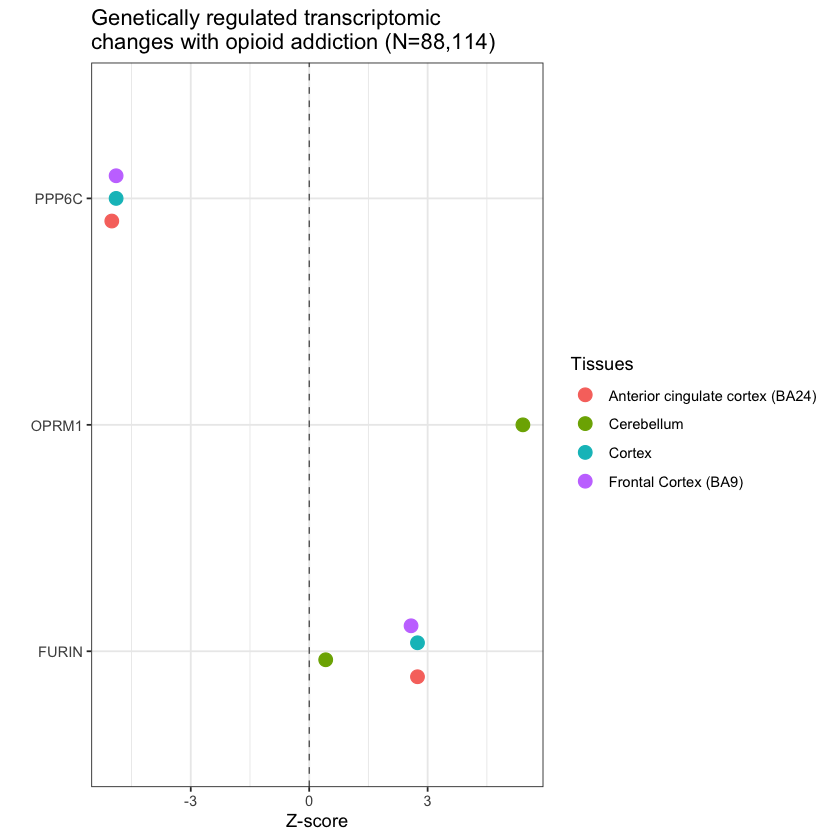

In [11]:
# sample R code
library(ggplot2)
library(dplyr)


spredixcan <- data.frame(
                         gene_name = c("OPRM1", "FURIN", "PPP6C", "FURIN", "PPP6C", "FURIN", "PPP6C", "FURIN"),
                         zscore = c(5.412908799, 0.418039135, -4.890491962, 2.580171108, -4.890491962, 2.742949486, -5.000211239, 2.742949486),
                         tissue = c("Cerebellum", "Cerebellum", "Frontal Cortex (BA9)", "Frontal Cortex (BA9)", "Cortex", "Cortex", "Anterior cingulate cortex (BA24)", "Anterior cingulate cortex (BA24)")
                        )
spredixcan

# have to flip the coordinates to "stack" the points
myplot <- ggplot(spredixcan, aes(x = gene_name, y = zscore,  color=tissue)) +
                 geom_point(size = 3.5, position=position_dodge(width = 0.3)) + theme_bw() +
                 labs(color='Tissues') +
                 xlab("") +
                 ylab("Z-score") +
                 geom_hline(yintercept=0, size = 0.25, linetype = "dashed") + 
                 ggtitle("Genetically regulated transcriptomic\nchanges with opioid addiction (N=88,114)") +
                 coord_flip()
                
myplot 


# Standard meta
With GTEX v8.


,gene,gene_name,zscore,effect_size,pvalue,var_g,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight,X,pvalue_adjusted..within.tissue.,pvalue_adjusted..across.tissue.
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
4,ENSG00000173611.17,SCAI,-4.7910127,NA,0.00000166,0.016621129,2,2,2,0.00000449,0.10610414,Cerebellum,0.02279540,0.05966518
7,ENSG00000173611.17,SCAI,-4.5112281,NA,0.00000645,0.006278858,2,2,2,0.00002200,0.07631244,Frontal cortex (BA9),0.07404699,0.14799321
12,ENSG00000173611.17,SCAI,-4.2435617,NA,0.00002200,0.000622406,1,1,1,0.00002200,0.03610769,Anterior cingulate cortex (BA24),0.16087691,0.19521268
24,ENSG00000119414.11,PPP6C,-4.1432624,NA,0.00003420,0.018361783,1,1,1,0.00003420,0.20106964,Anterior cingulate cortex (BA24),0.16087691,0.19521268
47,ENSG00000173611.17,SCAI,-3.9515398,NA,0.00007760,0.003068896,1,1,1,0.00007760,0.08171336,Cortex,0.19650509,0.24050182
5637,ENSG00000140564.11,FURIN,2.2317724,NA,0.02563001,0.002652769,1,1,1,0.02563001,0.12408110,Frontal cortex (BA9),0.71855634,0.73071601
9039,ENSG00000112038.17,OPRM1,2.0058930,NA,0.04486766,0.053799128,2,2,2,0.01710000,0.30963952,Cerebellum,0.81830483,0.79752406
13382,ENSG00000119414.11,PPP6C,-1.8083632,NA,0.07054999,0.017036474,1,1,1,0.07054999,0.19526029,Frontal cortex (BA9),0.84445645,0.84630178
13385,ENSG00000119414.11,PPP6C,-1.8083632,NA,0.07054999,0.011626199,1,1,1,0.07054999,0.16101375,Cortex,0.86050483,0.84630178


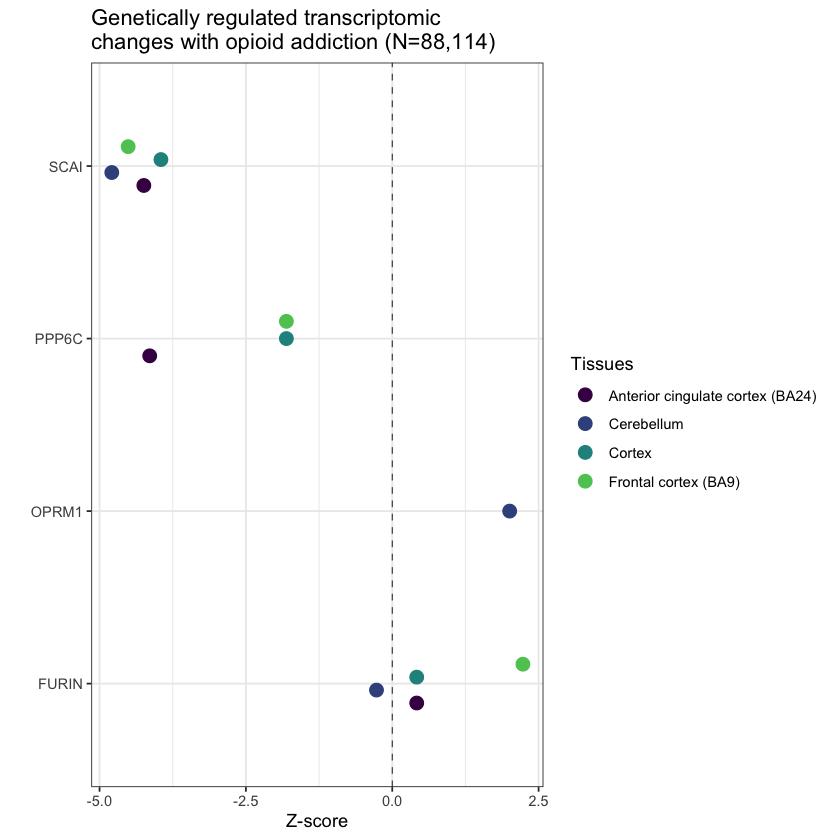

In [14]:
library(viridis)

predixcan <- read.csv(file = "~/Projects/heroin/ldsc/oaall/partitioned_h2/0001/metaxcan_results/oprm1_meta_analysis_predixcan_gtex_v8_metaxcan_results_fdr_1.0.csv",
                     stringsAsFactors=FALSE)

gene_list = c("FURIN", "SCAI", "OPRM1", "PPP6C")
brain_tissues = c("mashr_Brain_Cortex.metaxcan_results",
                  "mashr_Brain_Cerebellum.metaxcan_results",
                  "mashr_Brain_Frontal_Cortex_BA9.metaxcan_results", 
                  "mashr_Brain_Anterior_cingulate_cortex_BA24.metaxcan_results")
tissue_labels = c("Cortex", "Cerebellum", "Frontal cortex (BA9)", "Anterior cingulate cortex (BA24)")


our_genes <- predixcan[(predixcan$gene_name %in% gene_list),]
significant_tissues <- our_genes[(our_genes$X %in% brain_tissues),]
significant_tissues <- significant_tissues %>% mutate(X = recode(X, 
                            mashr_Brain_Cortex.metaxcan_results = 'Cortex',
                            mashr_Brain_Frontal_Cortex_BA9.metaxcan_results = 'Frontal cortex (BA9)',
                            mashr_Brain_Cerebellum.metaxcan_results = 'Cerebellum',
                            mashr_Brain_Anterior_cingulate_cortex_BA24.metaxcan_results = 'Anterior cingulate cortex (BA24)'))
significant_tissues

myplot <- ggplot(significant_tissues, aes(x = zscore, y = gene_name, color = X)) +
                 geom_point(size = 3.5, position=position_dodge(width = 0.3)) + theme_bw() +
                 labs(color= 'Tissues') +
                 xlab("Z-score") +
                 ylab("") +
                 geom_vline(xintercept=0, size = 0.25, linetype = "dashed") + 
                 ggtitle("Genetically regulated transcriptomic\nchanges with opioid addiction (N=88,114)") 

myplot + scale_colour_viridis_d(alpha = 1,
  begin = 0,
  end = 0.75,
  direction = 1,
  option = "D",
  aesthetics = "colour")